### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

import warnings
warnings.filterwarnings("ignore", category=Warning)
%matplotlib inline

### Functions

In [23]:
def data_splitter(Ntest, data):
    train = data.iloc[:-Ntest]
    test = data.iloc[-Ntest:]
    
    return train, test

def plot_result(model, Ntest, fulldata):
    train, test = data_splitter(Ntest, fulldata)
    params = model.get_params()
    d = params["order"][1]
    
    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(fulldata.index, fulldata, label="data")
    ax.plot(train.index[d:], train_pred, label="fitted")
    ax.plot(test.index, test_pred, label="forecast")
    

    ax.fill_between(test.index, confint[:,0], confint[:,1], color="red", alpha=0.3)
    ax.legend()

    
def plot_test(model, Ntest, fulldata):
    train, test = data_splitter(Ntest, fulldata)
    
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(test.index, test, label="true")
    ax.plot(test.index, test_pred, label="forecast")
    

    ax.fill_between(test.index, confint[:,0], confint[:,1], color="red", alpha=0.3)
    ax.legend()

    
def rmse(t, y):

    return np.sqrt(np.mean((t - y)**2))

### Code

In [4]:
df = pd.read_csv("../02-Financial basics/sp500sub.csv", index_col="Date", parse_dates=True)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


### GOOG

In [10]:
goog = df[df["Name"]=="GOOG"]["Close"]

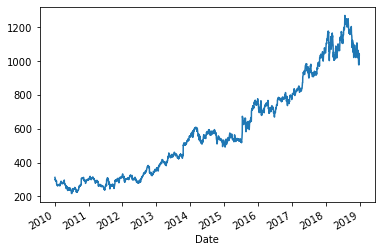

In [11]:
goog.plot();

In [12]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [14]:
model = pm.auto_arima(train, error_action="ignore", trace=True, suppress_warnings=True, mixter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16241.932, Time=7.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16268.065, Time=2.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.873, Time=2.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16241.128, Time=8.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.97 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16243.290, Time=9.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16243.959, Time=9.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16241.190, Time=9.93 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16255.943, Time=6.32 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=16242.043, Time=12.11 sec
 ARIMA(3,1,2)(0,0,

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -8113.564
Date:                Thu, 11 Nov 2021   AIC                          16241.128
Time:                        04:24:28   BIC                          16281.103
Sample:                             0   HQIC                         16255.724
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8342      0.516      1.616      0.106      -0.177       1.846
ar.L1         -0.6646      0.026    -25.113      0.000      -0.716      -0.613
ar.L2         -0.9261      0.019    -48.438      0.000      -0.964      -0.889
ar.L3          0.0394      0.015      2.642      0.008       0.010       0.069
ma.L1          0.7068      0.022     32.381      0.000       0.664       0.750
ma.L2          0.9184      0.020     45.141      0.000       0.879       0.958
sigma2        84.0377      1.046     80.341      0.000      81.988      86.088
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11419.03
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.60   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

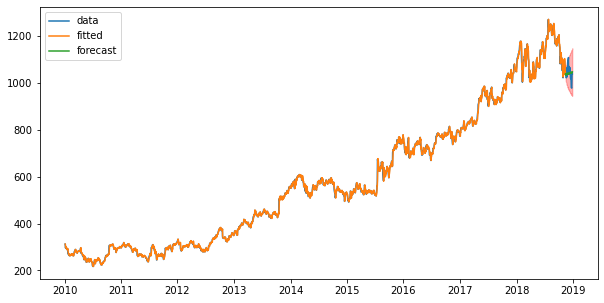

In [22]:
plot_result(model, Ntest, goog)

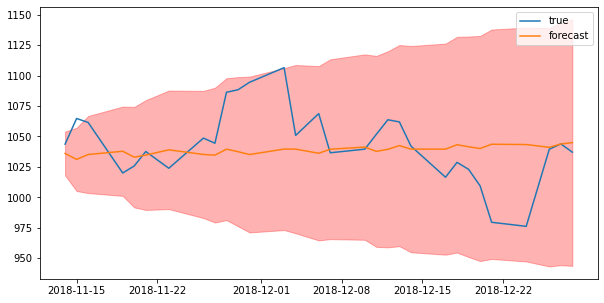

In [24]:
plot_test(model, Ntest, goog)

In [26]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 30.85711849545394
RMSE Naive: 30.029502477261467


### AAPL

In [27]:
aapl = df[df["Name"]=="AAPL"]["Close"]

In [28]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]

In [29]:
model = pm.auto_arima(train, error_action="ignore", trace=True, suppress_warnings=True, mixter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.032, Time=3.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8570.853, Time=1.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8555.486, Time=6.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.672, Time=3.67 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8572.624, Time=2.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8571.351, Time=9.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8569.373, Time=4.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8570.617, Time=2.50 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=8559.213, Time=6.11 sec
 ARIMA(3,1,2)(0,0,0)[0]          

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -4270.743
Date:                Thu, 11 Nov 2021   AIC                           8555.486
Time:                        04:59:20   BIC                           8595.460
Sample:                             0   HQIC                          8570.082
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1888      0.093      2.027      0.043       0.006       0.371
ar.L1         -0.6850      0.038    -18.069      0.000      -0.759      -0.611
ar.L2         -0.9181      0.024    -38.051      0.000      -0.965      -0.871
ar.L3          0.0071      0.014      0.497      0.619      -0.021       0.035
ma.L1          0.7251      0.035     20.634      0.000       0.656       0.794
ma.L2          0.9068      0.029     31.519      0.000       0.850       0.963
sigma2         2.6877      0.041     66.296      0.000       2.608       2.767
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5492.98
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.16   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

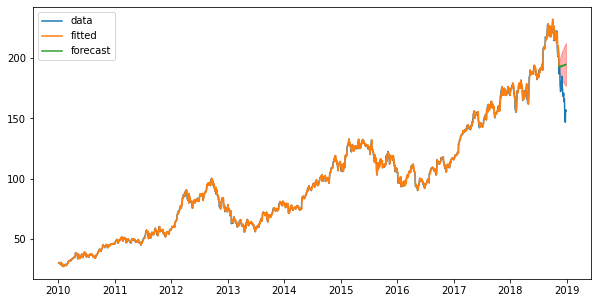

In [31]:
plot_result(model, Ntest, aapl)

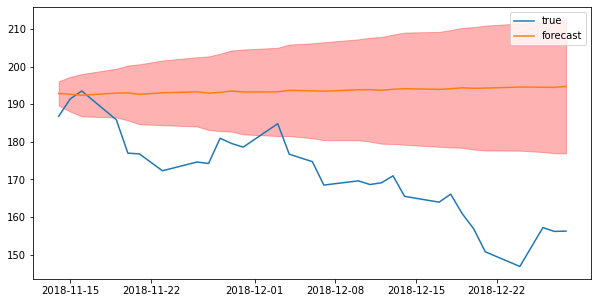

In [32]:
plot_test(model, Ntest, aapl)

In [33]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 25.523761250988084
RMSE Naive: 24.02712058667382


### IBM

In [34]:
ibm = df[df["Name"]=="IBM"]["Close"]

In [35]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]

In [36]:
model = pm.auto_arima(train, error_action="ignore", trace=True, suppress_warnings=True, mixter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9435.839, Time=4.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.454, Time=1.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.113 seconds


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Thu, 11 Nov 2021   AIC                           9434.097
Time:                        05:02:03   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

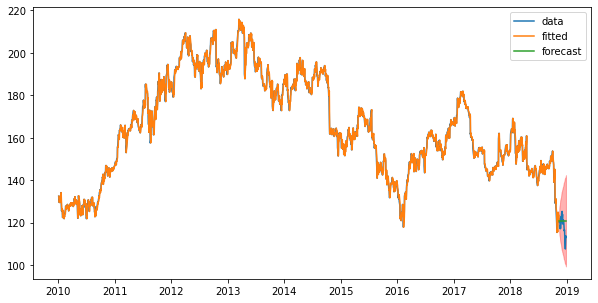

In [38]:
plot_result(model, Ntest, ibm)

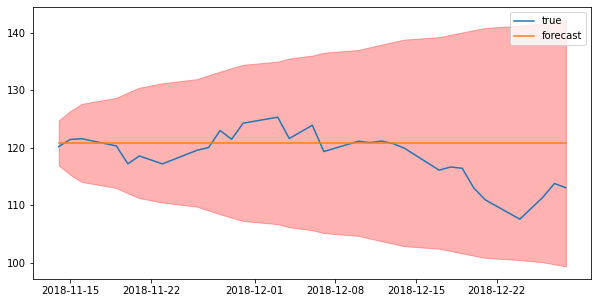

In [39]:
plot_test(model, Ntest, ibm)

In [40]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 4.763157130051095
RMSE Naive: 4.763157130051095


### SBUX

In [41]:
sbux = df[df["Name"]=="SBUX"]["Close"]

In [42]:
train = sbux.iloc[:-Ntest]
test = sbux.iloc[-Ntest:]

In [43]:
model = pm.auto_arima(train, error_action="ignore", trace=True, suppress_warnings=True, mixter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3852.831, Time=2.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=0.51 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.334 seconds


In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Thu, 11 Nov 2021   AIC                           3851.895
Time:                        05:05:12   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

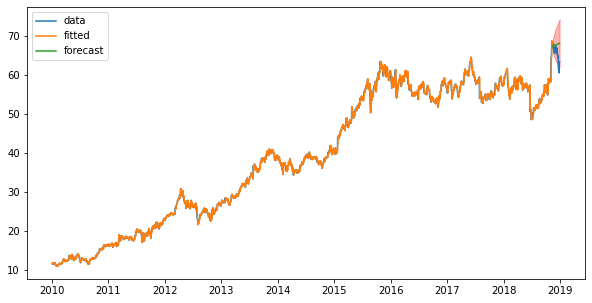

In [47]:
plot_result(model, Ntest, sbux)

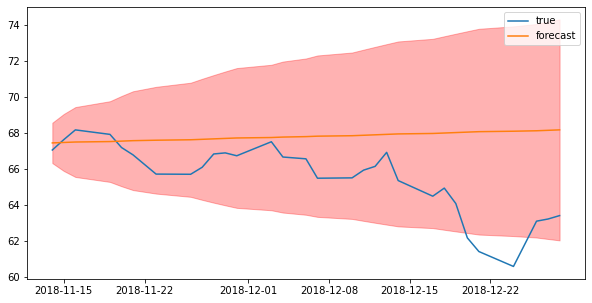

In [48]:
plot_test(model, Ntest, sbux)

In [49]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 3.094903477837591
RMSE Naive: 2.6889385763409135
